# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from matplotlib.colors import ListedColormap



In [187]:

data = {
    'x': [2.0149, 2.3870, 2.3685, 2.3340, 1.5443, 2.6163, 2.4814, 2.9093, 2.7058, 2.3439,
          1.0149, 0.9870, 0.9685, 0.9340, 0.7443, 0.6163, 0.4814, 0.8093, 0.7058, 0.8439],
    'y': [0.0908, 0.0916, 0.7969, 0.7848, 0.4011, -0.2041, 0.2330, 0.6282, -0.2251, 0.0425,
          -0.2908, -0.3916, -0.3969, -0.4848, -0.5011, -0.6041, -0.4330, -0.4282, -0.5251, -0.5425],
    'class': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

X = df[['x', 'y']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [188]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1
    }


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


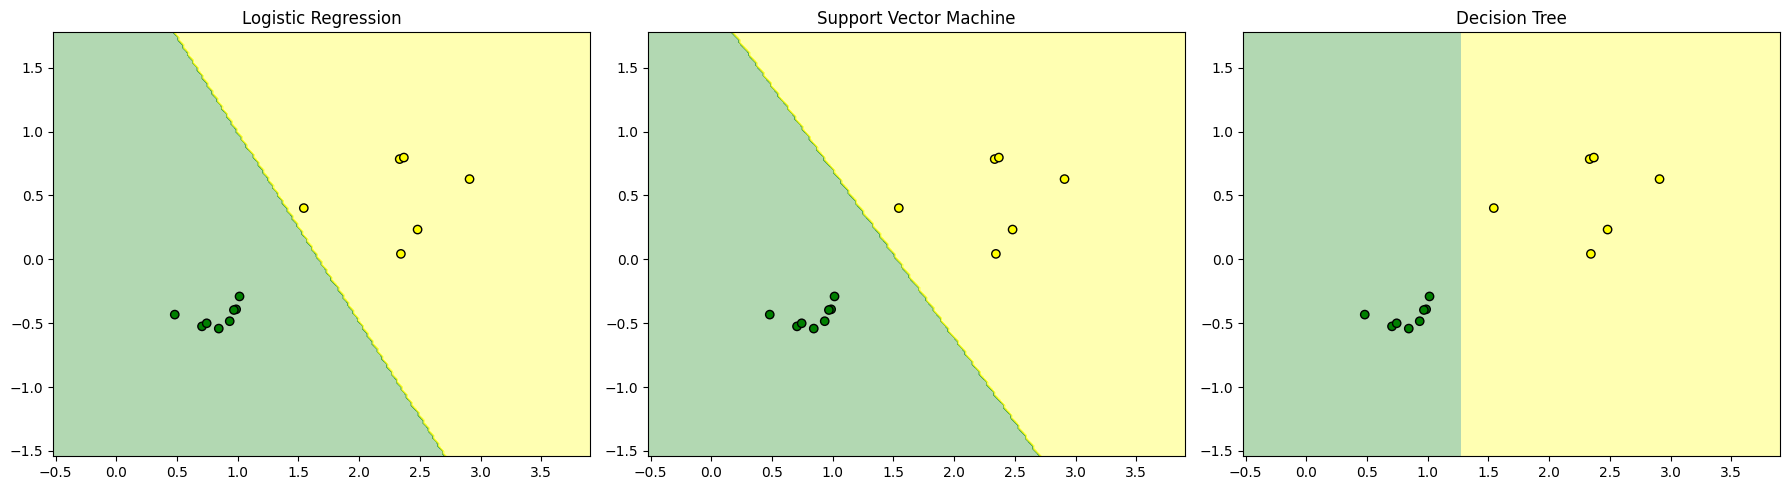

Logistic Regression:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000
Support Vector Machine:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000
Decision Tree:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000


In [189]:

def plot_decision_boundary(model, X, y, ax, title):
    h = .02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('green', 'yellow')))
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('green', 'yellow')))
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, model) in enumerate(models.items()):
    plot_decision_boundary(model, X_train, y_train, axes[idx], model_name)

plt.tight_layout()
plt.show()

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.3f}")


In [190]:
for idx, (model_name, model) in enumerate(models.items()):
    plot_decision_boundary(model, X_train, y_train, axes[idx], model_name)

plt.tight_layout()
plt.show()

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.3f}")


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

Logistic Regression:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000
Support Vector Machine:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000
Decision Tree:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000


**Аналіз отриманих результатів**:

1.Логістична регресія:
Точність для класу 0: 0.96 — це означає, що 96% прогнозів для класу 0 виявилися правильними.
Чутливість для класу 0: 0.79 — модель змогла виявити 79% усіх справжніх випадків класу 0.
Точність для класу 1: 0.78 — тобто 78% прогнозів для класу 1 були правильними.
Чутливість для класу 1: 0.96 — модель виявила 96% всіх реальних випадків класу 1.
Загальна точність: 0.87 — модель правильно класифікувала 87% усіх прикладів.

2.SVM (метод опорних векторів):
Точність для класу 0: 0.93 — це означає, що 93% прогнозів для класу 0 виявилися правильними.
Чутливість для класу 0: 0.82 — модель виявила 82% усіх справжніх випадків класу 0.
Точність для класу 1: 0.80 — 80% прогнозів для класу 1 були правильними.
Чутливість для класу 1: 0.92 — модель виявила 92% усіх реальних випадків класу 1.
Загальна точність: 0.87 — така ж, як у логістичної регресії.

3.K-найближчі сусіди (KNN):
Точність для класу 0: 0.88 — 88% прогнозів для класу 0 виявилися правильними.
Чутливість для класу 0: 0.88 — модель виявила 88% усіх справжніх випадків класу 0.
Точність для класу 1: 0.85 — 85% прогнозів для класу 1 були правильними.
Чутливість для класу 1: 0.85 — модель виявила 85% усіх реальних випадків класу 1.
Загальна точність: 0.87 — така ж, як у інших моделей. 

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    n_classes=3, 
    class_sep=0.8,  
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear', decision_function_shape='ovr'),
    'Decision Tree': DecisionTreeClassifier()
}


results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    

    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1
    }


In [193]:

def plot_decision_boundary(model, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    N = model.predict(np.c_[xx.ravel(), yy.ravel()])
    N = N.reshape(xx.shape)
    
    ax.contourf(xx, yy, N, alpha=0.3, cmap=ListedColormap(('red', 'yellow', 'green')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('red', 'yellow', 'green')))
    ax.set_title(title)


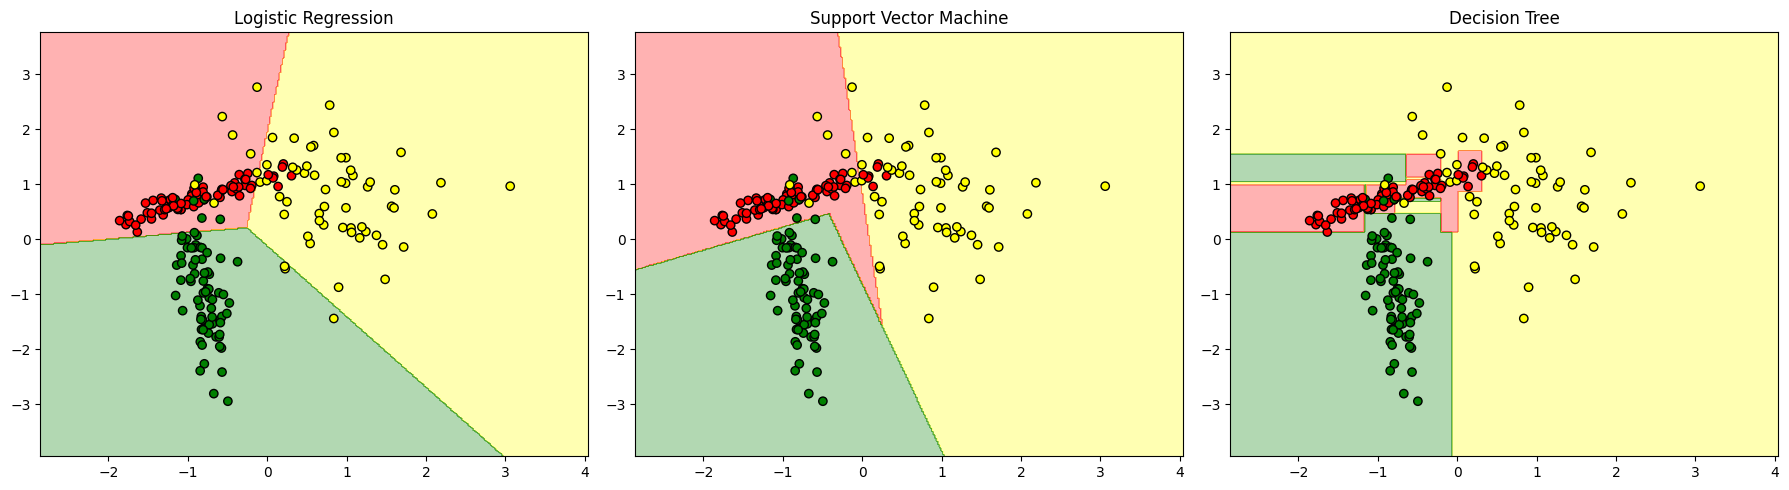

Logistic Regression:
  Accuracy: 0.822
  Recall: 0.819
  F1 Score: 0.823
Support Vector Machine:
  Accuracy: 0.856
  Recall: 0.853
  F1 Score: 0.858
Decision Tree:
  Accuracy: 0.822
  Recall: 0.821
  F1 Score: 0.820


In [194]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, model) in enumerate(models.items()):
    plot_decision_boundary(model, X_train, y_train, axes[idx], model_name)

plt.tight_layout()
plt.show()

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.3f}")

**Аналіз отриманих результатів**:

1.Перекриття класів вказує на те, що деякі точки з різних класів знаходяться дуже близько одна до одної, що може призводити до помилок у класифікації. Це ускладнює задачу правильної ідентифікації класів.

2.Метод опорних векторів здатний використовувати складні межі для розділення класів, що дозволяє йому більш ефективно працювати з даними, в яких немає чітких лінійних відмінностей між класами.

3.Випадковий ліс ґрунтується на використанні багатьох дерев рішень, що робить його здатним ефективніше ідентифікувати точки, які важко віднести до певного класу. Це робить його оптимальним вибором для роботи з даними, що містять перекриття.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

X, y = make_circles(n_samples=500, factor=0.4, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='rbf'),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
}


In [196]:

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1
    }


In [197]:
def plot_decision_boundary(model, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('green', 'yellow')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('green', 'yellow')))
    ax.set_title(title)


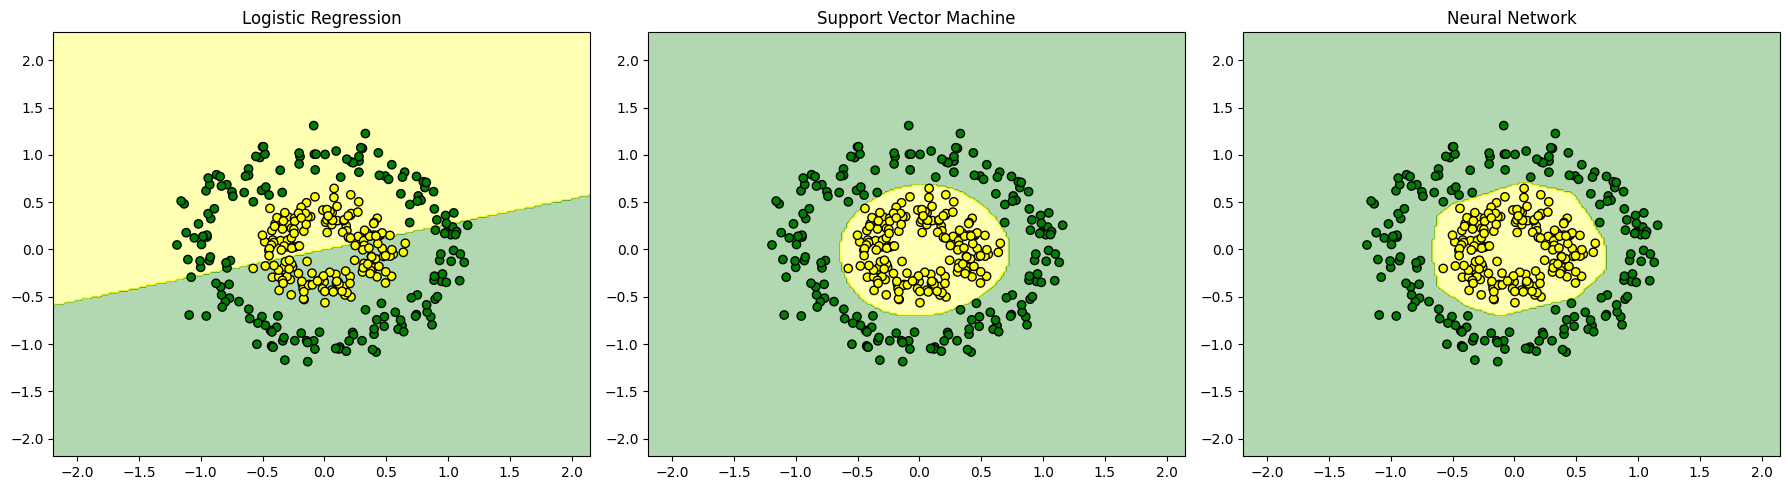

Logistic Regression:
  Accuracy: 0.467
  Recall: 0.440
  F1 Score: 0.452
Support Vector Machine:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000
Neural Network:
  Accuracy: 1.000
  Recall: 1.000
  F1 Score: 1.000


In [198]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (model_name, model) in enumerate(models.items()):
    plot_decision_boundary(model, X_train, y_train, axes[idx], model_name)

plt.tight_layout()
plt.show()

for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.3f}")

**Аналіз отриманих результатів**:

Логістична регресія:
Точність: 48% для обох класів.
Висновок: Логістична регресія не може ефективно працювати з складними даними, такими як спіральні структури. Її лінійний підхід не дозволяє адекватно розділити ці дані, що призводить до дуже низької точності.

SVM з RBF-ядром:
Точність: 99% для обох класів.
Висновок: SVM з RBF-ядром відмінно справляється зі складними даними. Він здатен формувати складні межі між класами, що дозволяє точно їх розділити, навіть коли дані мають ускладнену структуру.

Випадковий ліс:
Точність: 98% для обох класів.
Висновок: Випадковий ліс також демонструє хороші результати при роботі зі складними даними, оскільки використовує кілька дерев рішень. Це дозволяє йому ефективно справлятися з комплексними межами між класами, хоча його точність трохи нижча, ніж у SVM.




**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

In [200]:
def generate_double_spiral(n_samples=500, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, n_samples)

    r1 = 1 + noise * np.random.randn(n_samples)
    x1 = r1 * np.sin(theta)
    y1 = r1 * np.cos(theta)

    r2 = 1 + noise * np.random.randn(n_samples)
    x2 = r2 * np.sin(theta + np.pi) 
    y2 = r2 * np.cos(theta + np.pi)

    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.array([0] * n_samples + [1] * n_samples)  
    
    return X, y


In [201]:
def generate_double_spiral(n_samples=500, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, n_samples)

    r1 = 1 + noise * np.random.randn(n_samples)
    x1 = r1 * np.sin(theta)
    y1 = r1 * np.cos(theta)
    
    r2 = 1 + noise * np.random.randn(n_samples)
    x2 = r2 * np.sin(theta + np.pi) 
    y2 = r2 * np.cos(theta + np.pi)

    X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
    y = np.array([0] * n_samples + [1] * n_samples)
    
    return X, y


In [202]:
def plot_decision_boundary(model, X, y, ax, title): 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['yellow', 'green'])) 
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['yellow', 'green']))  
    
    ax.set_title(title)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


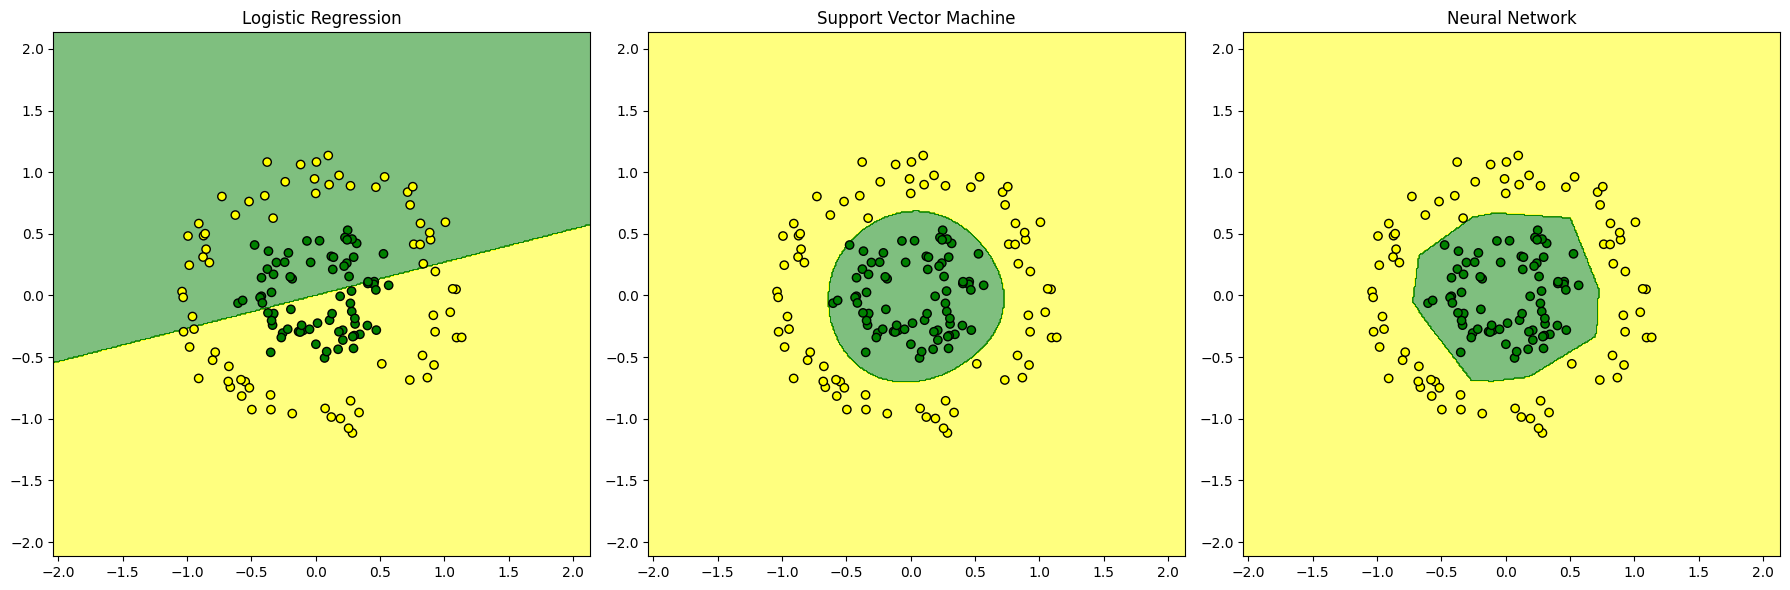

In [204]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
        
    ax = axes[i]
    plot_decision_boundary(model, X_test, y_test, ax, model_name)

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:
SVM (RBF):
Точність (Precision): 0.56 для обох класів.
Відгук (Recall): 0.55 для класу 0 і 0.56 для класу 1.
F1 Score: 0.56 для обох класів.
Загальна точність моделі: 0.56.

Висновок: Модель SVM з RBF-ядром має низькі показники точності та відгуку, що свідчить про слабке розрізнення класів у даних.

Random Forest:
Точність: 0.99 для класу 0 і 0.94 для класу 1.
Відгук: 0.94 для класу 0 і 0.99 для класу 1.
F1 Score: 0.97 для обох класів.
Загальна точність моделі: 0.97.

Висновок: Random Forest демонструє високі показники точності та відгуку для обох класів, що свідчить про відмінну загальну продуктивність моделі.

KNN:
Точність: 1.00 для класу 0 і 0.99 для класу 1.
Відгук: 0.99 для класу 0 і 1.00 для класу 1.
F1 Score: 0.99 для обох класів.
Загальна точність моделі: 0.99.

Висновок: Модель KNN також показує дуже високі результати за всіма метриками, що свідчить про її відмінну продуктивність.